In [1]:
#load(sage.env.SAGE_STARTUP_FILE)
%display latex

In [2]:
# Parallelism().set(nproc=12)

## Defining the space-time

In [3]:
var('M', domain='positive')
Scw.<t,r,θ,ϕ> = manifolds.Kerr(m=M,a=0)
show(Scw.default_chart().coord_range())
g = Scw.metric()
g.display()

t: (-oo, +oo); r: (0, +oo); θ: (0, pi); ϕ: [-pi, pi] (periodic)

g = (2*M/r - 1) dt⊗dt - r^2/(2*M*r - r^2) dr⊗dr + r^2 dθ⊗dθ + r^2*sin(θ)^2 dϕ⊗dϕ

## Polynomial-Rational coordinates

In [4]:
PR.<t,r,χ,ϕ> = Scw.chart(r't r:(0,oo) χ:[-1,1]:\chi ϕ:[-pi,pi]:periodic:\phi')
show(PR.coord_range())
SC_to_PR = PR.transition_map(Scw.default_chart(), [t,r,arccos(χ),ϕ])
SC_to_PR.display()

t: (-oo, +oo); r: (0, +oo); χ: [-1, 1]; ϕ: [-pi, pi] (periodic)

t = t
r = r
θ = arccos(χ)
ϕ = ϕ

In [5]:
Scw.set_default_chart(PR)
Scw.set_default_frame(PR.frame())
g.display()

g = (2*M - r)/r dt⊗dt - r/(2*M - r) dr⊗dr - r^2/(χ^2 - 1) dχ⊗dχ + (-r^2*χ^2 + r^2) dϕ⊗dϕ

## Scalar field and Klein-Gordon equation

The solutions of the Klein-Gordon equation are modes of frequency $ω$,
orbital number $ℓ ∈ N$ and azimuthal $m ∈ Z$, with $−ℓ ≤ m ≤ ℓ$
$$Φ_{ωℓm}(t, r, χ, ϕ) = \exp(−iωt + imϕ) R_{ωℓ}(r)S_{ℓm}(χ)$$

Since the KG is linear, any linear combination of modes is also a solution

$$Φ(t, r, χ, ϕ) = \int_{-\infty}^\infty dω \sum_{\ell=0}^\infty \sum_{m=-\ell}^\ell a_{ℓmω}\exp(−iωt + imϕ) R_{ωℓ}(r) S_{ℓm}(χ)$$

where $a_{ℓmω}$ are arbitrary functions of $ω$ for any given pair $(ℓ, m)$. The functions $a_{ℓmω}$ can be determined from the initial conditions associated with the problem under investigation.

**Taking into account the axisymmetry and the stationarity of the metric, we intrduce the following ansatz:**

In [6]:
var('m μ λ', domain='positive') # μ = M / ħ, λ = sep_constant
var('ω')
R, S = function('R')(r),function('S')(χ)
Φ = Scw.scalar_field(exp(-i*ω*t+i*m*ϕ)*R*S,latex_name=r'\Phi')
Φ.display()

M → ℝ
(t, r, χ, ϕ) ↦ R(r)*S(χ)*e^(-I*t*ω + I*m*ϕ)

**Below we calculate the left hand side of the Klein - Gordon equation:**

In [7]:
KG = (Φ.dalembertian()/Φ -μ^2).expr()
KG

-((r^3*χ^2*R(r) - r^3*R(r))*ω^2*S(χ) - ((2*M*r^2 - r^3)*μ^2*R(r) - ((2*M*r^2 - r^3)*μ^2*R(r) + 2*(2*M^2 - 3*M*r + r^2)*diff(R(r), r) + (4*M^2*r - 4*M*r^2 + r^3)*diff(R(r), r, r))*χ^2 + (2*M*m^2 - m^2*r)*R(r) + 2*(2*M^2 - 3*M*r + r^2)*diff(R(r), r) + (4*M^2*r - 4*M*r^2 + r^3)*diff(R(r), r, r))*S(χ) + 2*((2*M - r)*χ^3*R(r) - (2*M - r)*χ*R(r))*diff(S(χ), χ) + ((2*M - r)*χ^4*R(r) - 2*(2*M - r)*χ^2*R(r) + (2*M - r)*R(r))*diff(S(χ), χ, χ))/(((2*M*r^2 - r^3)*χ^2*R(r) - (2*M*r^2 - r^3)*R(r))*S(χ))

## Separating the equation

**My package for separating PDEs**

In [8]:
from separate_ed import separate

**We now try to separate $r$ and $\chi$ variables**

In [9]:
KG1 = separate(KG==0)
KG1

result checked!


[2*M*m^2/((2*M - r)*r^2*(χ + 1)*(χ - 1)) - m^2/((2*M - r)*r*(χ + 1)*(χ - 1)) - 2*(χ^2*diff(S(χ), χ, χ) + 2*χ*diff(S(χ), χ) - diff(S(χ), χ, χ))*M/((2*M - r)*r^2*S(χ)) + (χ^2*diff(S(χ), χ, χ) + 2*χ*diff(S(χ), χ) - diff(S(χ), χ, χ))/((2*M - r)*r*S(χ)),
 -(2*M*μ^2 - r*μ^2 + r*ω^2)/(2*M - r) + (4*M*diff(R(r), r, r) - r*diff(R(r), r, r) - 2*diff(R(r), r))/((2*M - r)*R(r)) - 2*(2*M*diff(R(r), r, r) - 3*diff(R(r), r))*M/((2*M - r)*r*R(r)) - 4*M^2*diff(R(r), r)/((2*M - r)*r^2*R(r)),
 0]

**Multiplying by $r^2$, we see that the equation separates:**

In [10]:
KG2 =  separate(KG1, is_list = True, factor=r^2)
KG2

result checked!


[-2*M*r^2*μ^2*R(r) + r^3*μ^2*R(r) - r^3*ω^2*R(r) - 4*M^2*r*diff(R(r), r, r) + 4*M*r^2*diff(R(r), r, r) - r^3*diff(R(r), r, r) - 2*M*λ*R(r) + r*λ*R(r) - 4*M^2*diff(R(r), r) + 6*M*r*diff(R(r), r) - 2*r^2*diff(R(r), r) == 0,
 -χ^4*diff(S(χ), χ, χ) - λ*χ^2*S(χ) - 2*χ^3*diff(S(χ), χ) + m^2*S(χ) + 2*χ^2*diff(S(χ), χ, χ) + λ*S(χ) + 2*χ*diff(S(χ), χ) - diff(S(χ), χ, χ) == 0]

**Just cheking**

In [11]:
for eq in KG2:
    display(diff(eq,r,χ))

0 == 0

0 == 0

**Note that the second equation is the associated Legendre equation. If we require that its solutions are well - behaved (i.e. non - singular) at $\chi = -1$ and $\chi =   1$ (equivalently, at $\theta = 0$ and $\theta = \pi$), the separation constant must be $\lambda =  \ell(\ell + 1)$, where $\ell$ is an integer.**

## Transformation of the radial equation to a Schroedinger-like equation

**First we do $\displaystyle R(r) = \frac{\psi(r)}{r}$**

In [12]:
ψ(r) = function('ψ', latex_name=r'\psi_{_{\ell m}}')(r)
new_R(r) = ψ(r)/r

In [13]:
eq_ψ_0 = KG2[0].subs({diff(R,r,k):diff(new_R,r,k) for k in range(3)}).canonicalize_radical()
display(eq_ψ_0)

-(r^4*ω^2*ψ(r) + (2*M*r^3 - r^4)*μ^2*ψ(r) + (2*M*r - r^2)*λ*ψ(r) + 2*(2*M^2 - M*r)*ψ(r) - 2*(2*M^2*r - M*r^2)*diff(ψ(r), r) + (4*M^2*r^2 - 4*M*r^3 + r^4)*diff(ψ(r), r, r))/r^2 == 0

**eliminating the $r^2$**

In [14]:
eq_ψ_1 = (eq_ψ_0*r^2).canonicalize_radical()
display(eq_ψ_1)

-r^4*ω^2*ψ(r) - (2*M*r^3 - r^4)*μ^2*ψ(r) - (2*M*r - r^2)*λ*ψ(r) - 2*(2*M^2 - M*r)*ψ(r) + 2*(2*M^2*r - M*r^2)*diff(ψ(r), r) - (4*M^2*r^2 - 4*M*r^3 + r^4)*diff(ψ(r), r, r) == 0

**Introducing the tortoise coordinate $r_\star$, so that $\dfrac{dr_\star}{dr} = \dfrac{r^2}{(r^2 - 2 Mr)}$. Therefore $\dfrac{d\psi}{dr} = \dfrac{d\psi}{dr_\star}\dfrac{dr_\star}{dr}$ and $\dfrac{d^2 \psi}{dr^2} = \dfrac{d\psi}{dr_\star}\dfrac{d^2 r_\star}{dr^2} + \dfrac{d^2 \psi}{dr_\star^2}\left(\dfrac{dr_\star}{dr}\right)^2$.**

**Testing**

In [15]:
u(r) = function('u')(r)
v(r) = function('v')(r)
display(diff(v(u(r)),r,2))

diff(u(r), r)^2*D[0, 0](v)(u(r)) + diff(u(r), r, r)*D[0](v)(u(r))

In [16]:
rtr(r) = function('rt', latex_name=r'r_\star')(r)
drt = r^2/(r^2-2*M*r)

In [17]:
eq_ψ_2 = eq_ψ_1.subs({diff(ψ(r),r,k):diff(ψ(rtr(r)),r,k) for k in range(3)})
display(eq_ψ_2)

-r^4*ω^2*ψ(rt(r)) - (2*M*r^3 - r^4)*μ^2*ψ(rt(r)) - (2*M*r - r^2)*λ*ψ(rt(r)) + 2*(2*M^2*r - M*r^2)*diff(rt(r), r)*D[0](ψ)(rt(r)) - (4*M^2*r^2 - 4*M*r^3 + r^4)*(diff(rt(r), r)^2*D[0, 0](ψ)(rt(r)) + diff(rt(r), r, r)*D[0](ψ)(rt(r))) - 2*(2*M^2 - M*r)*ψ(rt(r)) == 0

In [18]:
eq_ψ_3 = eq_ψ_2.subs({diff(rtr,r,k+1):diff(drt,r,k) for k in range(2)}).canonicalize_radical()
display(eq_ψ_3)

-r^4*ω^2*ψ(rt(r)) - r^4*D[0, 0](ψ)(rt(r)) - (2*M*r^3 - r^4)*μ^2*ψ(rt(r)) - (2*M*r - r^2)*λ*ψ(rt(r)) - 2*(2*M^2 - M*r)*ψ(rt(r)) == 0

defining $r_\star$ as symbolic variable and usi it

In [19]:
rt = var('rt', latex_name=r'r_\star', domain='real')
rt

rt

In [20]:
eq_ψ_4 = (eq_ψ_3/(-r^4)).subs({rtr:rt}).expand()
display(eq_ψ_4)

2*M*μ^2*ψ(rt)/r - μ^2*ψ(rt) + ω^2*ψ(rt) + 2*M*λ*ψ(rt)/r^3 - λ*ψ(rt)/r^2 + 4*M^2*ψ(rt)/r^4 - 2*M*ψ(rt)/r^3 + diff(ψ(rt), rt, rt) == 0

**Comparing the expression above with $$\left(\omega^2-V\right)\psi+\psi''=0$$ we find the potential.**

wild cards

In [21]:
w0 = SR.wild(0)
LV = eq_ψ_4.find(w0*ψ(rt))
LV

[-2*M*ψ(rt)/r^3,
 4*M^2*ψ(rt)/r^4,
 -λ*ψ(rt)/r^2,
 2*M*λ*ψ(rt)/r^3,
 ω^2*ψ(rt),
 -μ^2*ψ(rt),
 2*M*μ^2*ψ(rt)/r]

**Potential**

In [22]:
LV.remove(ω^2*ψ(rt))
V(r) = -(sum(LV)/ψ(rt)).expand()
V

r |--> -2*M*μ^2/r + μ^2 - 2*M*λ/r^3 + λ/r^2 - 4*M^2/r^4 + 2*M/r^3

In [23]:
eq_ψ = (ω^2-V)*ψ(rt)+diff(ψ(r),r,2).subs({r:rt})==0
display(eq_ψ)

r |--> (2*M*μ^2/r - μ^2 + ω^2 + 2*M*λ/r^3 - λ/r^2 + 4*M^2/r^4 - 2*M/r^3)*ψ(rt) + diff(ψ(rt), rt, rt) == 0

**Checking that both are the same equation**

In [24]:
(eq_ψ_4 - eq_ψ).canonicalize_radical()

r |--> 0 == 0

Substituing $\lambda = \ell(\ell+1)$

In [25]:
ℓ = var('ℓ', domain='positive')
eq_ψ = eq_ψ.subs({λ:ℓ*(ℓ+1)})
display(eq_ψ)

r |--> (2*M*μ^2/r - μ^2 + ω^2 + 2*M*(ℓ + 1)*ℓ/r^3 - (ℓ + 1)*ℓ/r^2 + 4*M^2/r^4 - 2*M/r^3)*ψ(rt) + diff(ψ(rt), rt, rt) == 0

In [26]:
V(r) = V(r).subs({λ:ℓ*(ℓ+1)})
V

r |--> -2*M*μ^2/r + μ^2 - 2*M*(ℓ + 1)*ℓ/r^3 + (ℓ + 1)*ℓ/r^2 - 4*M^2/r^4 + 2*M/r^3

In [27]:
plot3d(V(r).subs({M:1, ℓ:1}),(r,2,10), (μ,0,3),theme='dark')

Graphics3d Object

**Potential $V(r)$ and tortoise coordinates $r_\star$**

Setting the constant $C = -2M\log(2M)$ for tortoise coordinates

In [28]:
V(r) = V(r).subs({λ:ℓ*(ℓ+1)})
display(V(r))
tortoise = (integral(drt,r)-2*M*log(2*M)).simplify_log()
display(tortoise)

-2*M*μ^2/r + μ^2 - 2*M*(ℓ + 1)*ℓ/r^3 + (ℓ + 1)*ℓ/r^2 - 4*M^2/r^4 + 2*M/r^3

M*log(1/4*(2*M - r)^2/M^2) + r

## Plot of the potential

**Plot parameters $(m=1, \ell=1, \mu=.1)$**

In [29]:
fast_tortoise = fast_callable(tortoise.subs({M:1}), vars=[r])

In [30]:
fast_V = fast_callable(V(r).subs({M:1, ℓ:1, μ:.1}), vars=[r])

In [31]:
import numpy as np

In [32]:
r1 = np.arange(2+10**-5, 2+10**-3,10**-5)
r2 = np.arange(2+2*10**-3, 2+1*10**-1,10**-3)
r3 = np.arange(2+2*10**-1,50, 10**-1)

In [33]:
rr = np.concatenate((r1,r2,r3))
display(rr.max(),rr.min())

49.899999999999835

2.00001

In [34]:
tt = fast_tortoise(rr)
display(tt.max(),tt.min())

56.25193664771368

-22.412135291047246

In [35]:
vr = fast_V(rr)
display(vr.max(),vr.min())

0.10235678605815796

3.799937250685559e-06

In [36]:
plot_points = list(zip(tt,vr))

In [37]:
from matplotlib import rc
rc('text', usetex=True)

**Plots of the potential**

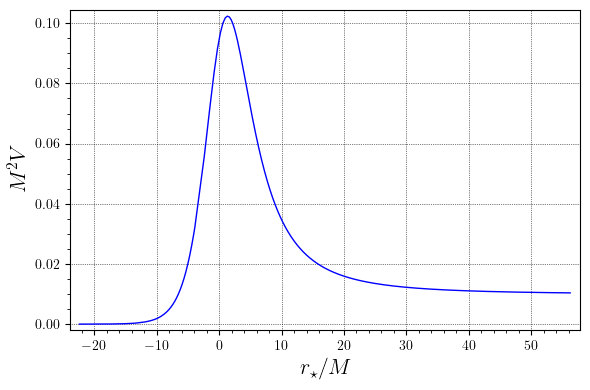

In [38]:
plot_potential = list_plot(plot_points, plotjoined=True, gridlines=True,axes_labels=[r'${r_\star}/{M}$','$M^2 V$'], frame=True, axes=False)
plot_potential

## Asymptotic solutions

**Near the event horizon (r=2M)**

In [39]:
limit(tortoise,r=2*M, dir='+')

-Infinity

In [40]:
limit(V(r),r=2*M)

0

In [41]:
eq_ψ_H = limit(eq_ψ,r=2*M, dir='+')(rt)
eq_ψ_H

ω^2*ψ(rt) + diff(ψ(rt), rt, rt) == 0

In [42]:
assume(ω>0)
ψ_H0 = desolve(eq_ψ_H,ψ(rt), ivar=rt).maxima_methods().exponentialize().expand()
ψ_H0

-1/2*I*_K1*e^(I*rt*ω) + 1/2*_K2*e^(I*rt*ω) + 1/2*I*_K1*e^(-I*rt*ω) + 1/2*_K2*e^(-I*rt*ω)

In [43]:
k1,k2 = ψ_H0.variables()[:2]

In [44]:
var('A_1 A_2')
aux1 = solve(A_2 == -1/2*I*k1+1/2*k2, k1, solution_dict=True)
aux2 = solve(A_1 == 1/2*I*k1+1/2*k2, k2, solution_dict=True)

In [45]:
s1 = sum(ψ_H0.find(w0*exp(i*rt*ω))).subs(aux1).expand()
s2 = sum(ψ_H0.find(w0*exp(-i*rt*ω))).subs(aux2).expand()
ψ_H = s1+s2
ψ_H

A_2*e^(I*rt*ω) + A_1*e^(-I*rt*ω)

- $A_1$ represents the amplitude of a wave that enters the black hole 
- $A_2$ represents the amplitude of a wave that exits the black hole.

**Far away from the black hole, i.e. when $r → ∞$**

In [46]:
limit(tortoise,r=oo)

+Infinity

In [47]:
limit(V(r),r=oo)

μ^2

In [48]:
eq_ψ_oo = limit(eq_ψ,r=oo)(rt)
eq_ψ_oo

-μ^2*ψ(rt) + ω^2*ψ(rt) + diff(ψ(rt), rt, rt) == 0

In [49]:
assume(ω-μ>0)
ψ_oo0 = desolve(eq_ψ_oo,ψ(rt), ivar=rt).maxima_methods().exponentialize().expand()
ψ_oo0

-1/2*I*_K1*e^(I*sqrt(-μ^2 + ω^2)*rt) + 1/2*_K2*e^(I*sqrt(-μ^2 + ω^2)*rt) + 1/2*I*_K1*e^(-I*sqrt(-μ^2 + ω^2)*rt) + 1/2*_K2*e^(-I*sqrt(-μ^2 + ω^2)*rt)

In [50]:
var('B_1 B_2')
s1 = sum(ψ_oo0.find(w0*exp(i*rt*sqrt(ω^2-μ^2)))).subs(aux1).expand()
s2 = sum(ψ_oo0.find(w0*exp(-i*rt*sqrt(ω^2-μ^2)))).subs(aux2).expand()
ψ_oo = (s1+s2).subs({A_1:B_1, A_2:B_2})
ψ_oo

B_2*e^(I*sqrt(-μ^2 + ω^2)*rt) + B_1*e^(-I*sqrt(-μ^2 + ω^2)*rt)

- If $ω > µ:$
    - $B_1$ represents the amplitude of an incoming wave at infinity;
    - $B_2$ represents the amplitude of an outgoing wave at infinity.
- If $ω < µ:$
    - $B_1$ represents an exponential growing mode at infinity;
    - $B_2$ represents an exponential decaying mode at infinity.